In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import cv2
import matplotlib.pyplot as plt

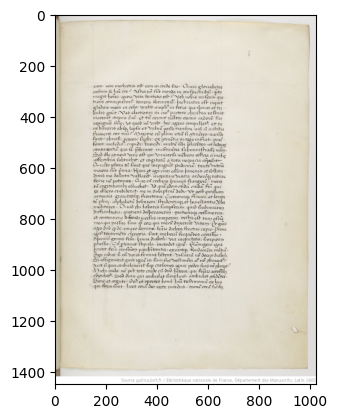

In [3]:
image = cv2.imread("../ImagesCodicologie/Corpus de jeu/Emilie Cottereau-Gabillet/BnF Lat 1865, f. 5r.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

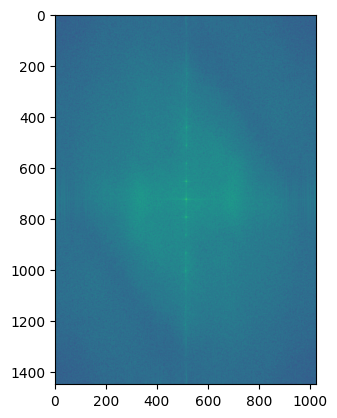

In [8]:
plt.imshow(np.log(1 + fftshift(np.abs(fft2(gray)))))
plt.show()

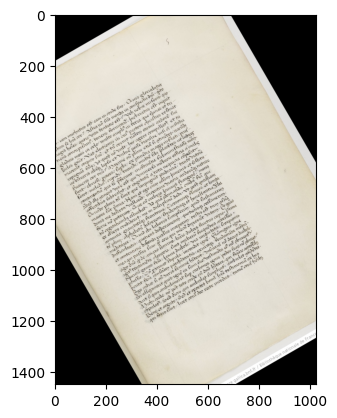

In [4]:
# import cv2
 
# Reading the image
#image = cv2.imread('image.jpg')
#image = gray
 
# dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
 
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=30, scale=1)
 
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
 
plt.imshow(image)
plt.imshow(rotated_image)
# wait indefinitely, press any key on keyboard to exit
# cv2.waitKey(0)
# save the rotated image to disk
# cv2.imwrite('rotated_image.jpg', rotated_image)

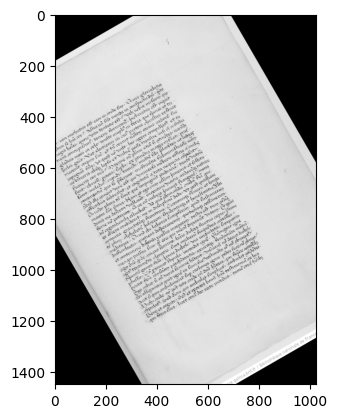

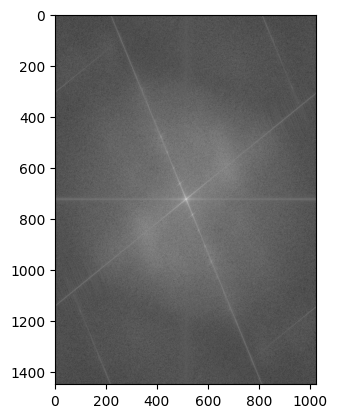

In [5]:
rotated_gray = cv2.warpAffine(src=gray, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_gray,cmap='gray')
plt.show()
plt.imshow(np.log(1 + fftshift(np.abs(fft2(rotated_gray)))),cmap='gray')
plt.show()

In [8]:
def computeFT(I):
    return np.fft.fft2(I)
    """ Array -> Array[complex] """

def toVisualizeFT(If):
    return np.fft.fftshift(np.abs(If))
    """ Array[complex] -> Array[float] """

def toVisualizeLogFT(If):
    return np.log(1+np.fft.fftshift(np.abs(If)))
    """ Array[complex] -> Array[float] """

In [9]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return (I>=s)*255

def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n,m = I.shape

    size = 32  
   
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array """
    return np.array(Image.fromarray(I).rotate(a, expand=True))
def rectifyOrientation(I):
    
    plt.imshow(I)
    plt.show()
    
    ftson=computeFT(I)
    
    moduleftson=toVisualizeFT(ftson)

    save=thresholdImage(moduleftson,3*10**(5))
    
    save=mainOrientation(save)

    rectified_image=rotateImage(I,-save[1])
    
    return rectified_image

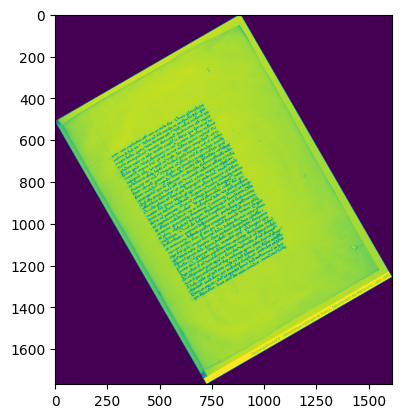

<function matplotlib.pyplot.show(close=None, block=None)>

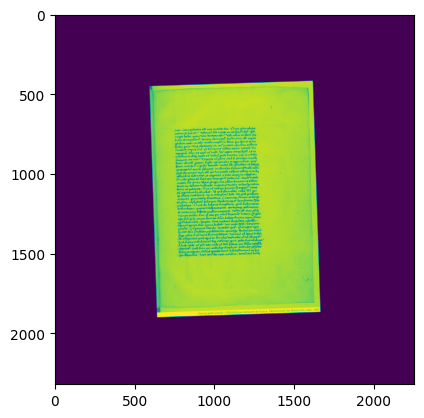

In [13]:
plt.imshow(rectifyOrientation(rotateImage(gray,30)))
plt.show